In [1]:
import numpy as np
import netCDF4 as nc
import f90nml
import os
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bio
import visualisations
%matplotlib inline

In [2]:
bathy = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [7]:
def limit_along_thalweg2(path, diafile, ptrcfile):
    resDir=path
    nampisprod=bio.load_nml_bio(resDir,'nampisprod',
                            namRefDir='/data/vdo/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SMELT/EXP00/')
    fdia=nc.Dataset(os.path.join(resDir,diafile))
    fptc=nc.Dataset(os.path.join(resDir,ptrcfile))
    with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as m:
        tmask=m.variables['tmask'][:,:,:,:]
    I=fdia.variables['PAR'][9,:,:,:]
    NO=fptc.variables['nitrate'][19,:,:,:]
    NH=fptc.variables['ammonium'][19,:,:,:]
    Si=fptc.variables['silicon'][19,:,:,:]
    D,M,N = bio.calc_p_limiters(I,NO,NH,Si,tmask[0,:,:,:],nampisprod)
    fig, ax = plt.subplots(3,1,figsize = (14,12))
    cbar = visualisations.contour_thalweg(ax[0], D['limiter'], bathy, mesh, 
                               np.arange(-1, 2.5, 0.5), cmap = 'jet')
    visualisations.contour_thalweg(ax[1], M['limiter'], bathy, mesh,
                              np.arange(-1,2.3,1), cmap = 'jet')
    visualisations.contour_thalweg(ax[2], N['limiter'], bathy, mesh,
                              np.arange(-1,2.3,1), cmap = 'jet')
    ax[0].set_title('Limiting Variable for Diatoms')
    ax[1].set_title('Limiting Variable for Mesodiniums')
    ax[2].set_title('Limiting Variable for Flagellates')
    for ax in ax:
        ax.set_ylim(35,0)
    plt.tight_layout()
    return cbar

In [4]:
def limit_along_thalweg(path, diafile, ptrcfile):
    resDir=path
    nampisprod=bio.load_nml_bio(resDir,'nampisprod',
                            namRefDir='/data/vdo/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SMELT/EXP00/')
    fdia=nc.Dataset(os.path.join(resDir,diafile))
    fptc=nc.Dataset(os.path.join(resDir,ptrcfile))
    with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as m:
        tmask=m.variables['tmask'][:,:,:,:]
    I=fdia.variables['PAR'][9,:,:,:]
    NO=fptc.variables['nitrate'][19,:,:,:]
    NH=fptc.variables['ammonium'][19,:,:,:]
    Si=fptc.variables['silicon'][19,:,:,:]
    D,M,N = bio.calc_p_limiters(I,NO,NH,Si,tmask[0,:,:,:],nampisprod)
    fig, ax = plt.subplots(6,1,figsize = (18,12))
    visualisations.contour_thalweg(ax[0], D['limiter'], bathy, mesh, 
                               np.arange(-1, 2.5, 1), cmap = 'jet')
    visualisations.contour_thalweg(ax[1], D['limval'], bathy, mesh,
                                  np.arange(0,1.1,0.2), cmap = 'Greens_r')
    visualisations.contour_thalweg(ax[2], M['limiter'], bathy, mesh,
                              np.arange(-1,2.3,1), cmap = 'jet')
    visualisations.contour_thalweg(ax[3], M['limval'], bathy, mesh,
                                  np.arange(2,3.1,0.2), cmap = 'Oranges_r')
    visualisations.contour_thalweg(ax[4], N['limiter'], bathy, mesh,
                              np.arange(-1,2.3,1), cmap = 'jet')
    visualisations.contour_thalweg(ax[5], N['limval'], bathy, mesh,
                                  np.arange(4,5.1,0.2), cmap = 'Purples_r')
    ax[0].set_title('Limiting Variable for Diatoms')
    ax[1].set_title('Limiting Value for Diatoms')
    ax[2].set_title('Limiting Variable for Mesodiniums')
    ax[3].set_title('Limiting Value for Mesodiniums')
    ax[4].set_title('Limiting Variable for Flagellates')
    ax[5].set_title('Limiting Value for Flagellates')
    for ax in ax:
        ax.set_ylim(35,0)
    plt.tight_layout()

In [7]:
path='/results/SalishSea/nowcast-green/02jan16' 
diafile='SalishSea_2h_20160102_20160111_dia1_T.nc'
ptrcfile= 'SalishSea_1h_20160102_20160102_ptrc_T.nc'
resDir=path
nampisprod=bio.load_nml_bio(resDir,'nampisprod',
                            namRefDir='/data/vdo/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SMELT/EXP00/')
fdia=nc.Dataset(os.path.join(resDir,diafile))
fptc=nc.Dataset(os.path.join(resDir,ptrcfile))
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as m:
        tmask=m.variables['tmask'][:,:,:,:]
I=fdia.variables['PAR'][9,:,:,:]
NO=fptc.variables['nitrate'][19,:,:,:]
NH=fptc.variables['ammonium'][19,:,:,:]
Si=fptc.variables['silicon'][19,:,:,:]
D,M,N = bio.calc_p_limiters(I,NO,NH,Si,tmask[0,:,:,:],nampisprod)

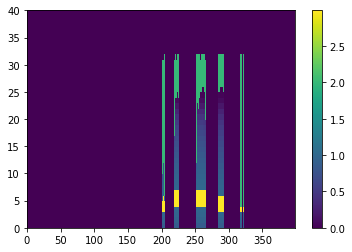

In [8]:
plt.pcolormesh(N['limval'][:,200,:])
plt.colorbar()

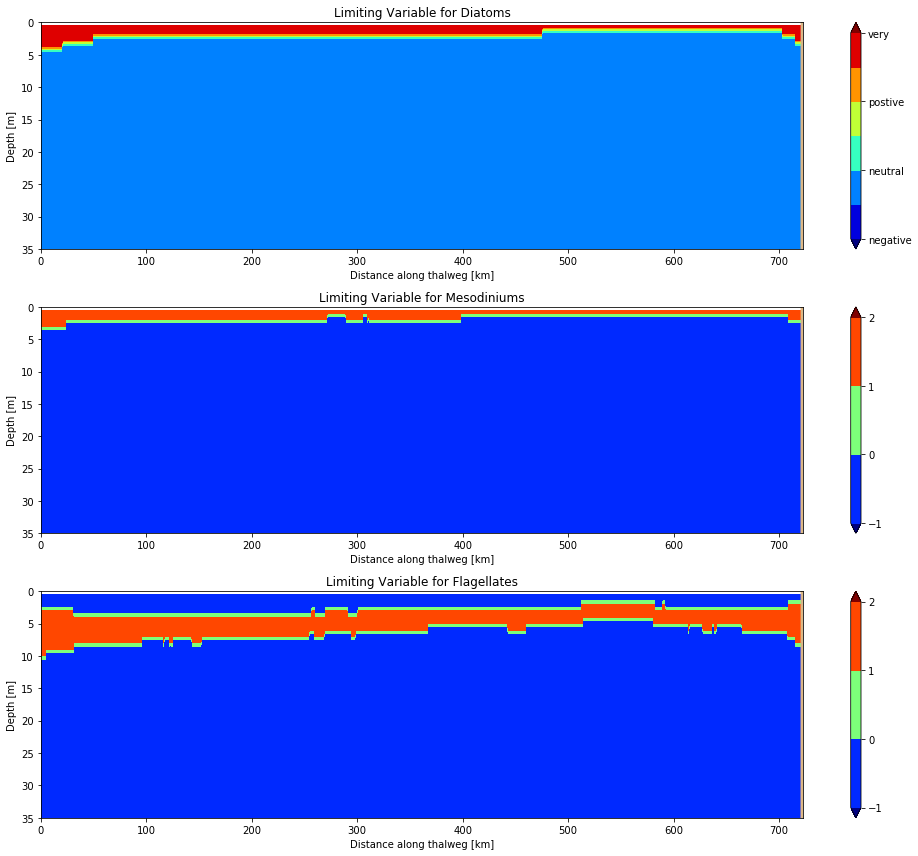

In [8]:
cbar = limit_along_thalweg2('/results/SalishSea/nowcast-green/02jan16', 
                    'SalishSea_2h_20160102_20160111_dia1_T.nc',
                   'SalishSea_1h_20160102_20160102_ptrc_T.nc')
cbar.set_ticks([-1,0,1,2])
cbar.set_ticklabels(['negative', 'neutral', 'postive', 'very'])

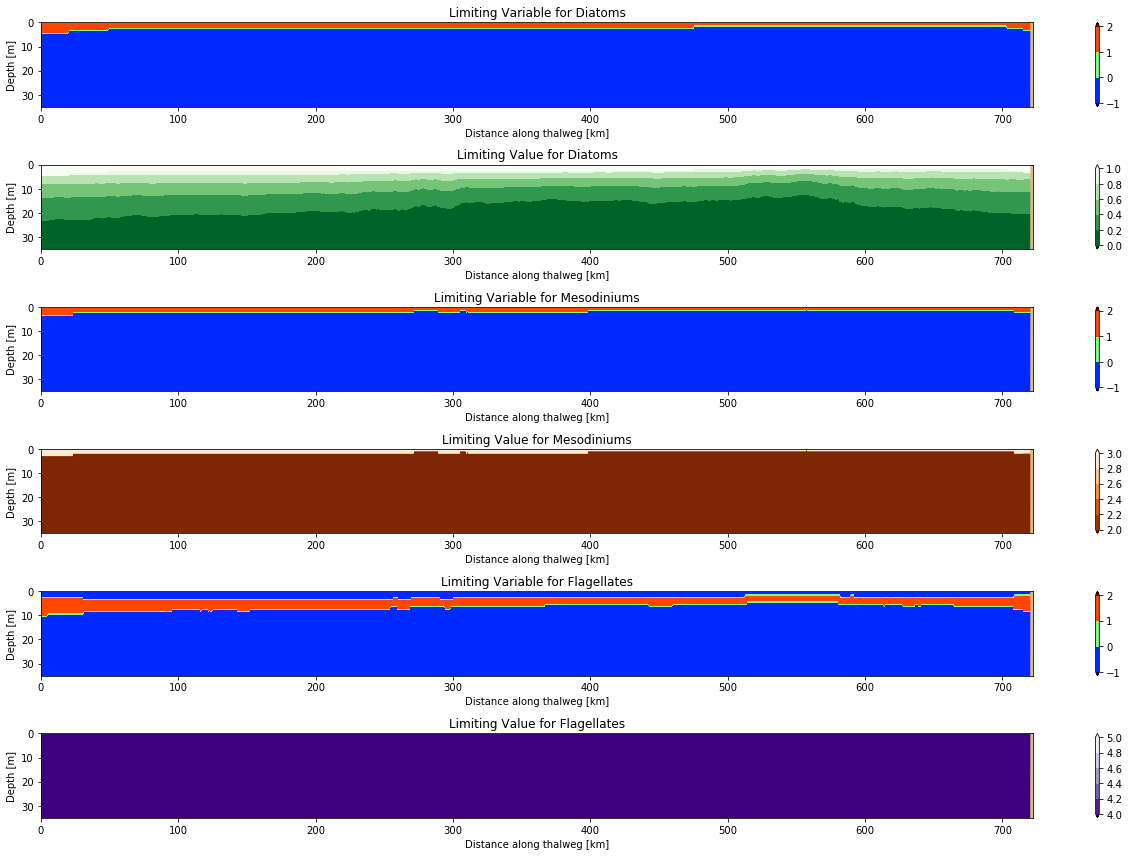

In [4]:
limit_along_thalweg('/results/SalishSea/nowcast-green/02jan16', 
                    'SalishSea_2h_20160102_20160111_dia1_T.nc',
                   'SalishSea_1h_20160102_20160102_ptrc_T.nc')

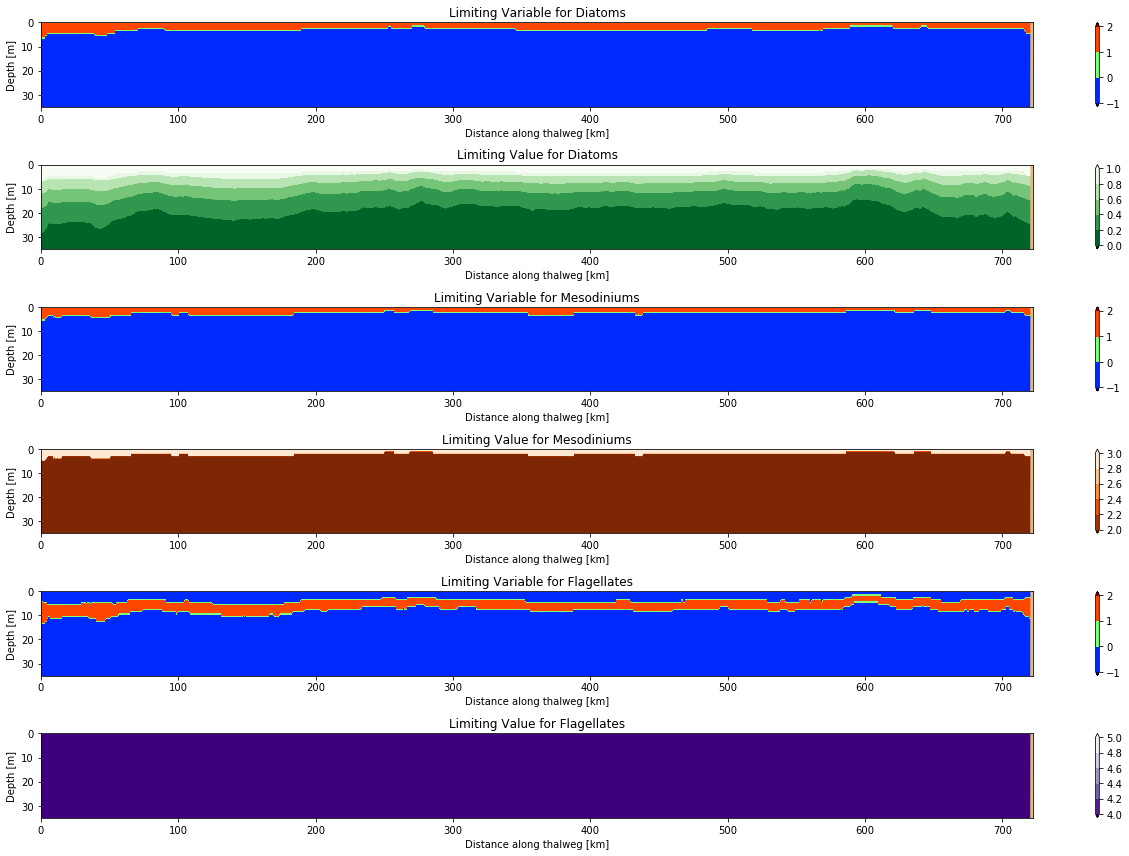

In [6]:
limit_along_thalweg('/results/SalishSea/nowcast-green/01feb16', 
                    'SalishSea_2h_20160201_20160210_dia1_T.nc',
                   'SalishSea_1h_20160201_20160201_ptrc_T.nc')

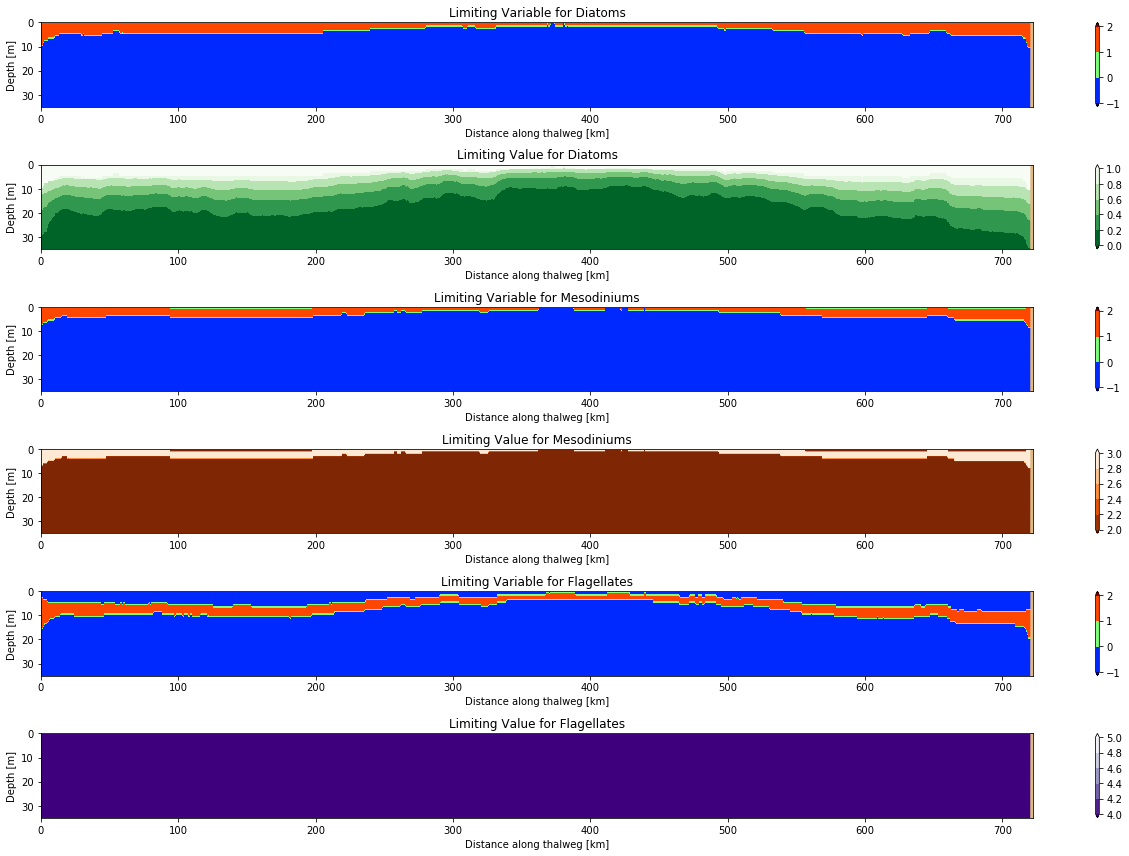

In [7]:
limit_along_thalweg('/results/SalishSea/nowcast-green/02mar16',
                   'SalishSea_2h_20160302_20160311_dia1_T.nc',
                   'SalishSea_1h_20160302_20160302_ptrc_T.nc')

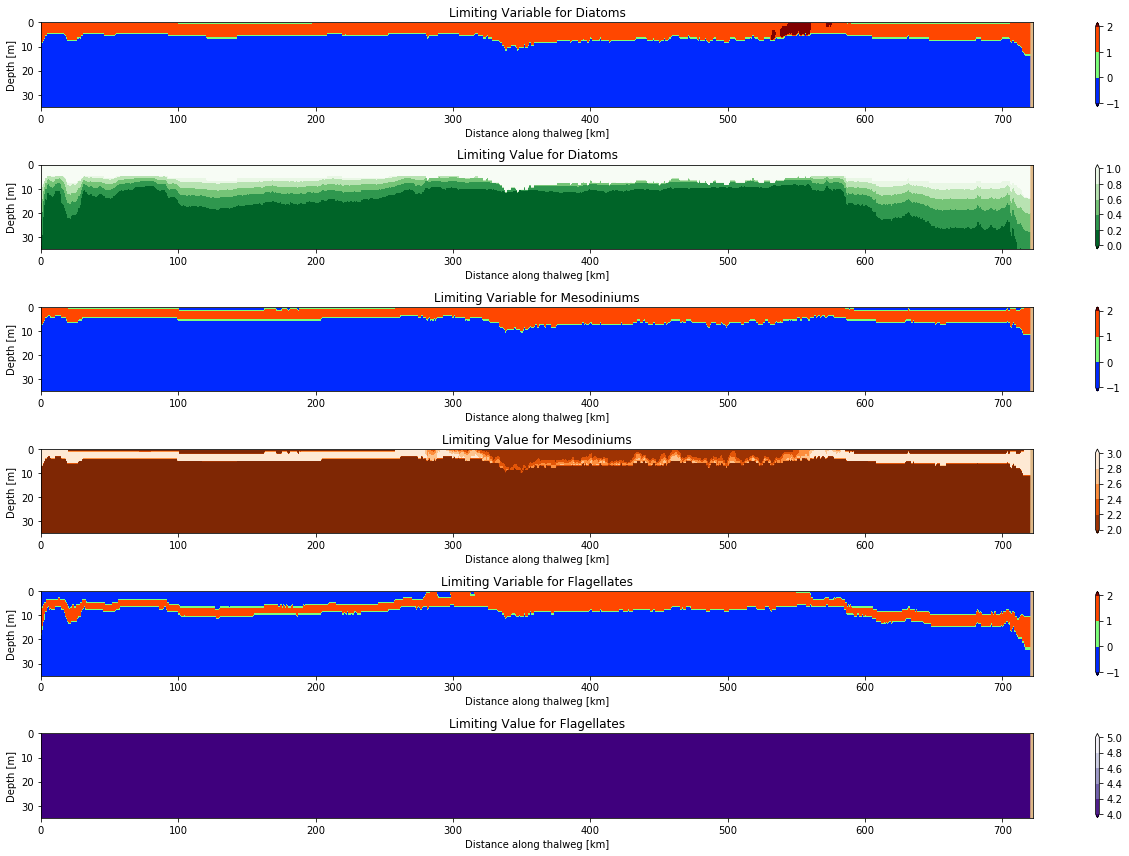

In [8]:
limit_along_thalweg('/results/SalishSea/nowcast-green/01apr16',
                   'SalishSea_2h_20160401_20160410_dia1_T.nc',
                   'SalishSea_1h_20160401_20160401_ptrc_T.nc')

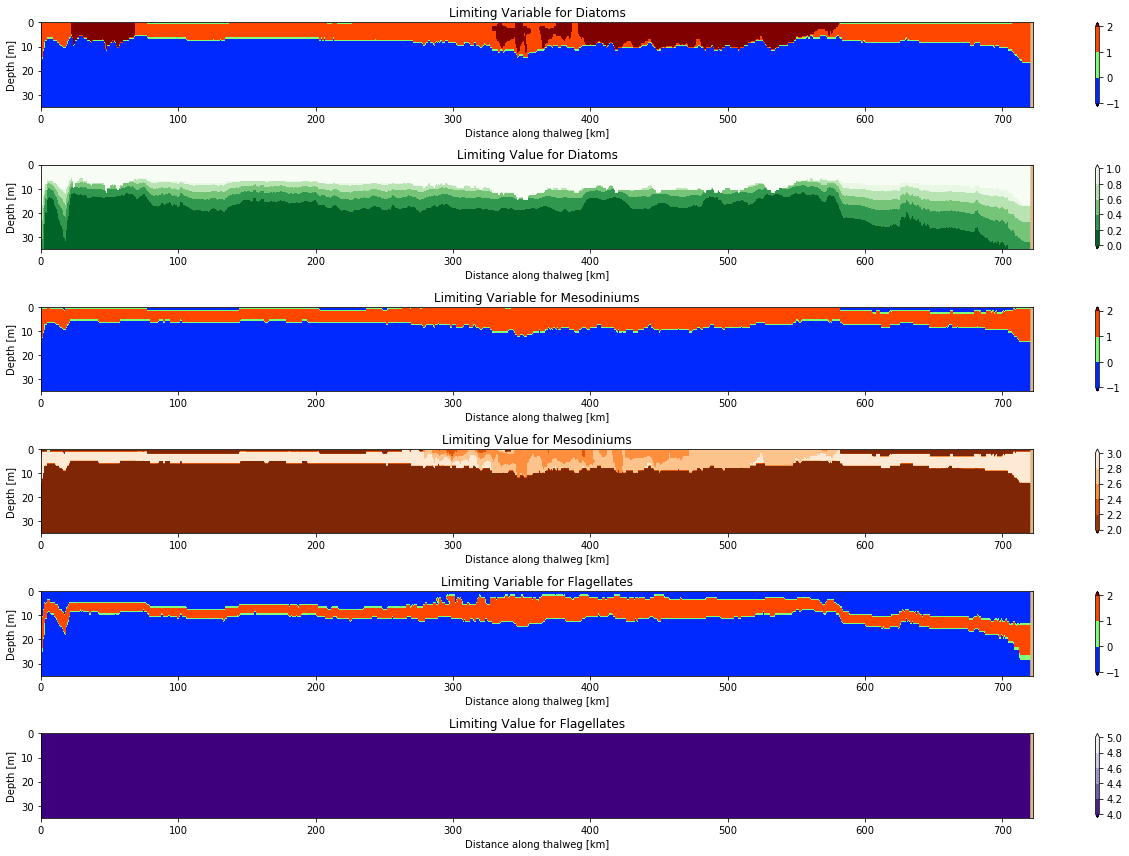

In [9]:
limit_along_thalweg('/results/SalishSea/nowcast-green/01may16',
                   'SalishSea_2h_20160501_20160510_dia1_T.nc',
                   'SalishSea_1h_20160501_20160501_ptrc_T.nc')

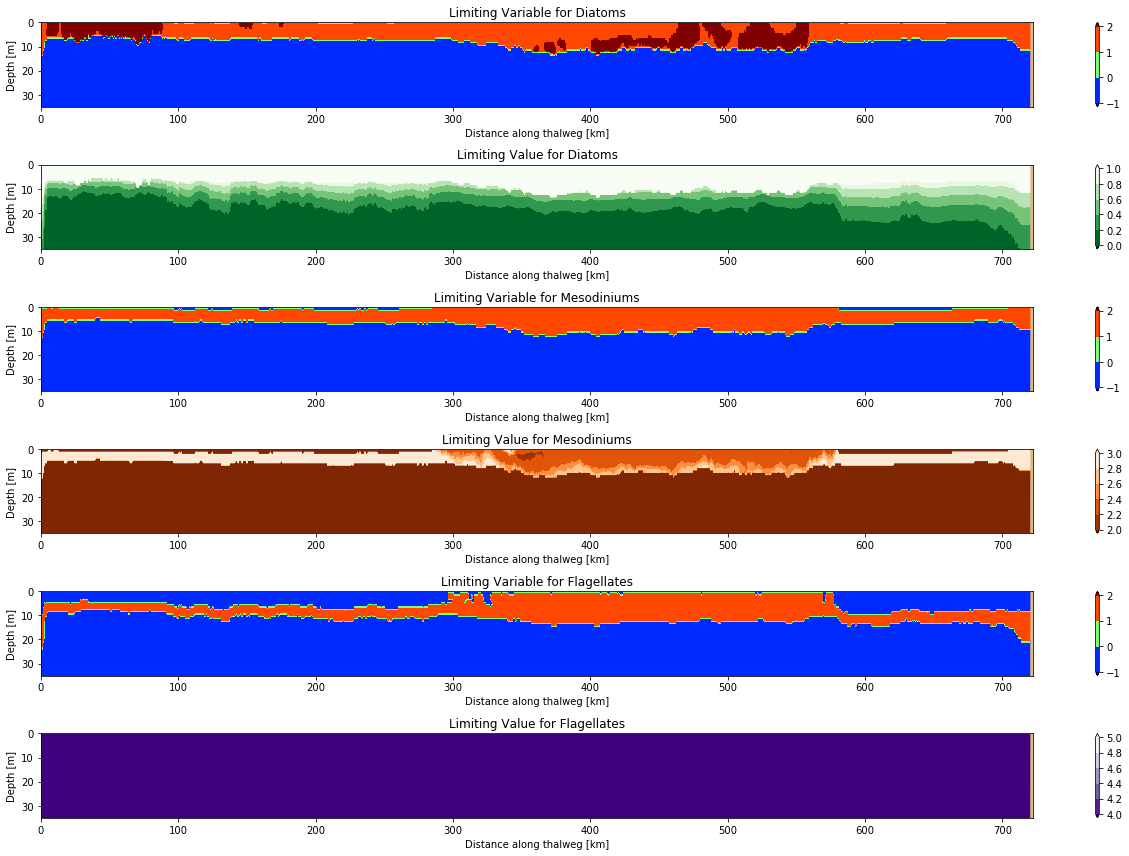

In [10]:
limit_along_thalweg('/results/SalishSea/nowcast-green/31may16',
                   'SalishSea_2h_20160531_20160609_dia1_T.nc',
                   'SalishSea_1h_20160531_20160531_ptrc_T.nc')

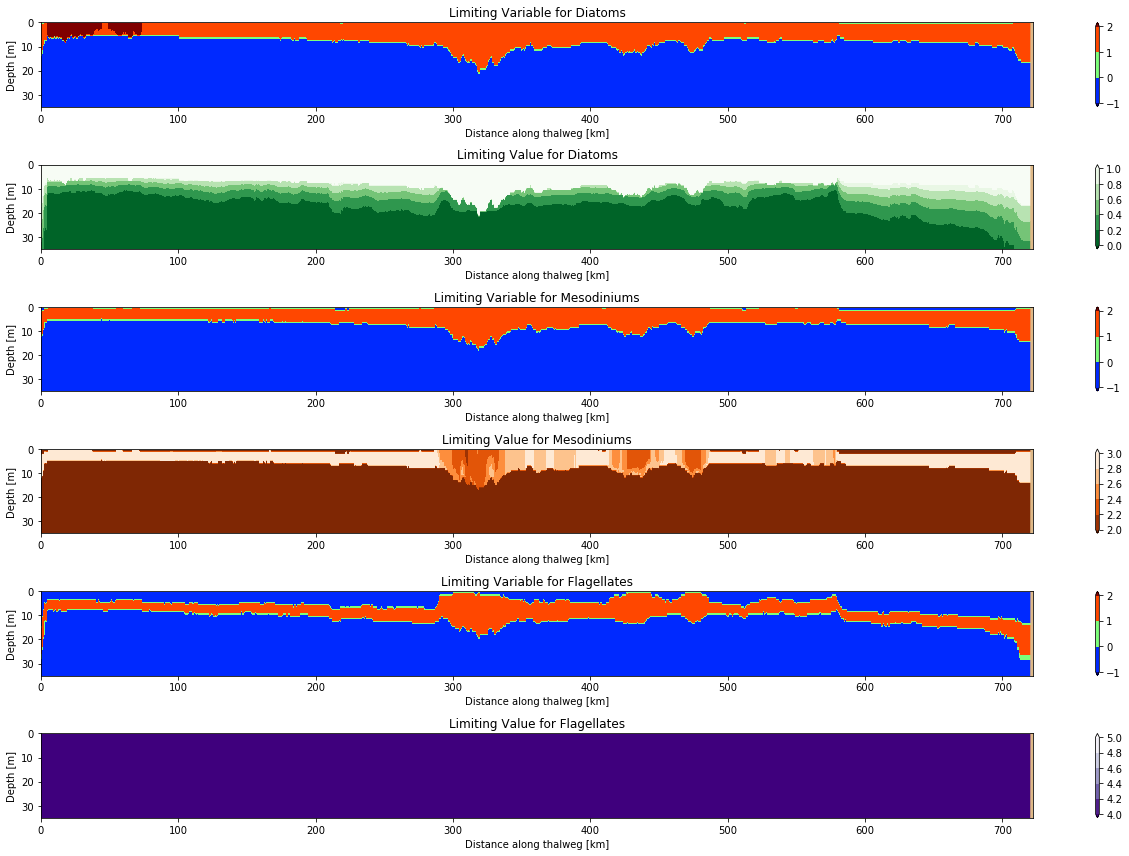

In [11]:
limit_along_thalweg('/results/SalishSea/nowcast-green/30jul16',
                   'SalishSea_2h_20160730_20160808_dia1_T.nc',
                   'SalishSea_1h_20160730_20160730_ptrc_T.nc')

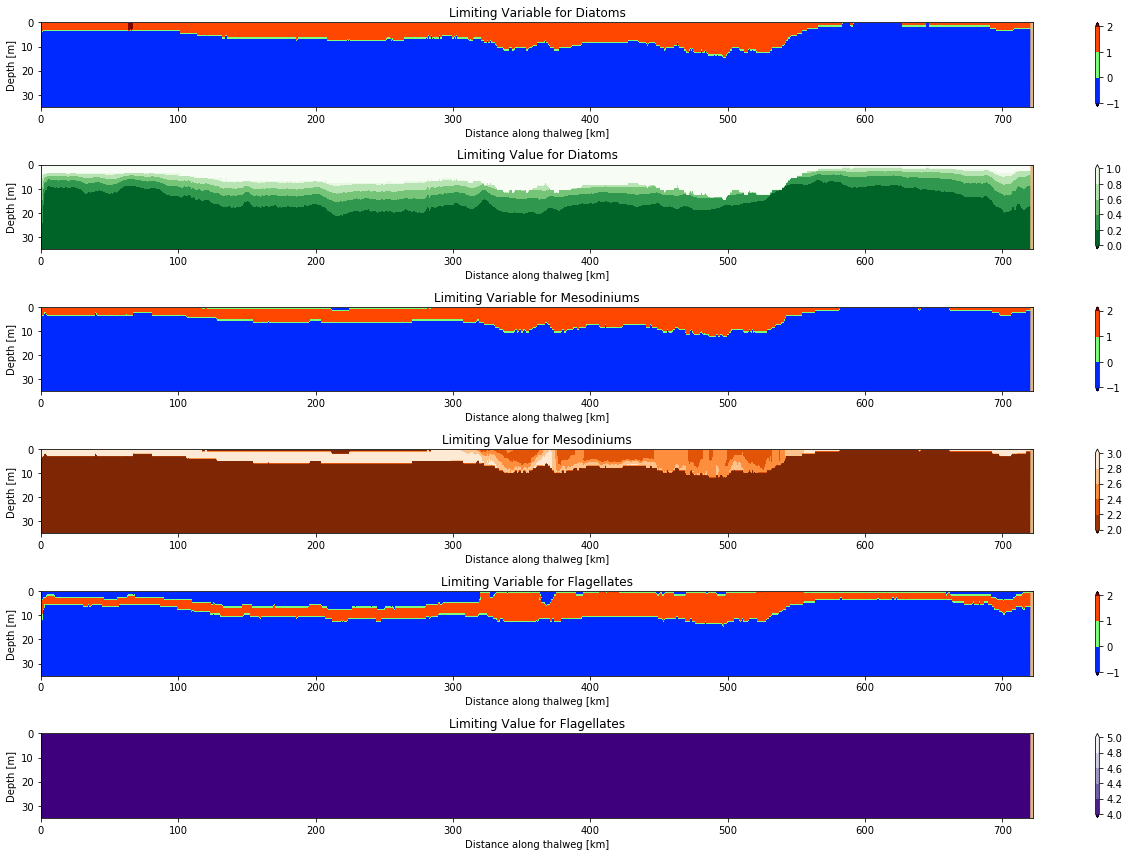

In [12]:
limit_along_thalweg('/results/SalishSea/nowcast-green/29aug16',
                   'SalishSea_2h_20160829_20160907_dia1_T.nc',
                   'SalishSea_1h_20160829_20160829_ptrc_T.nc')

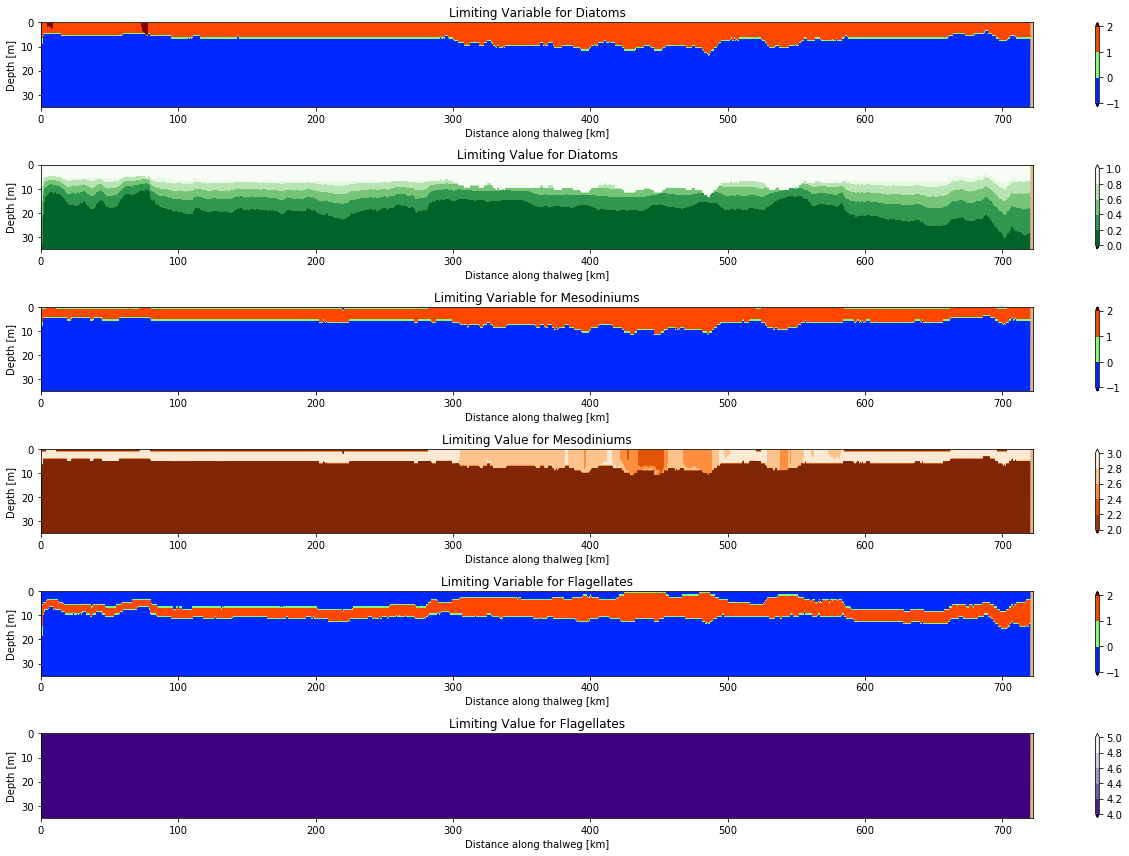

In [13]:
limit_along_thalweg('/results/SalishSea/nowcast-green/28sep16',
                   'SalishSea_2h_20160928_20161007_dia1_T.nc',
                   'SalishSea_1h_20160928_20160928_ptrc_T.nc')

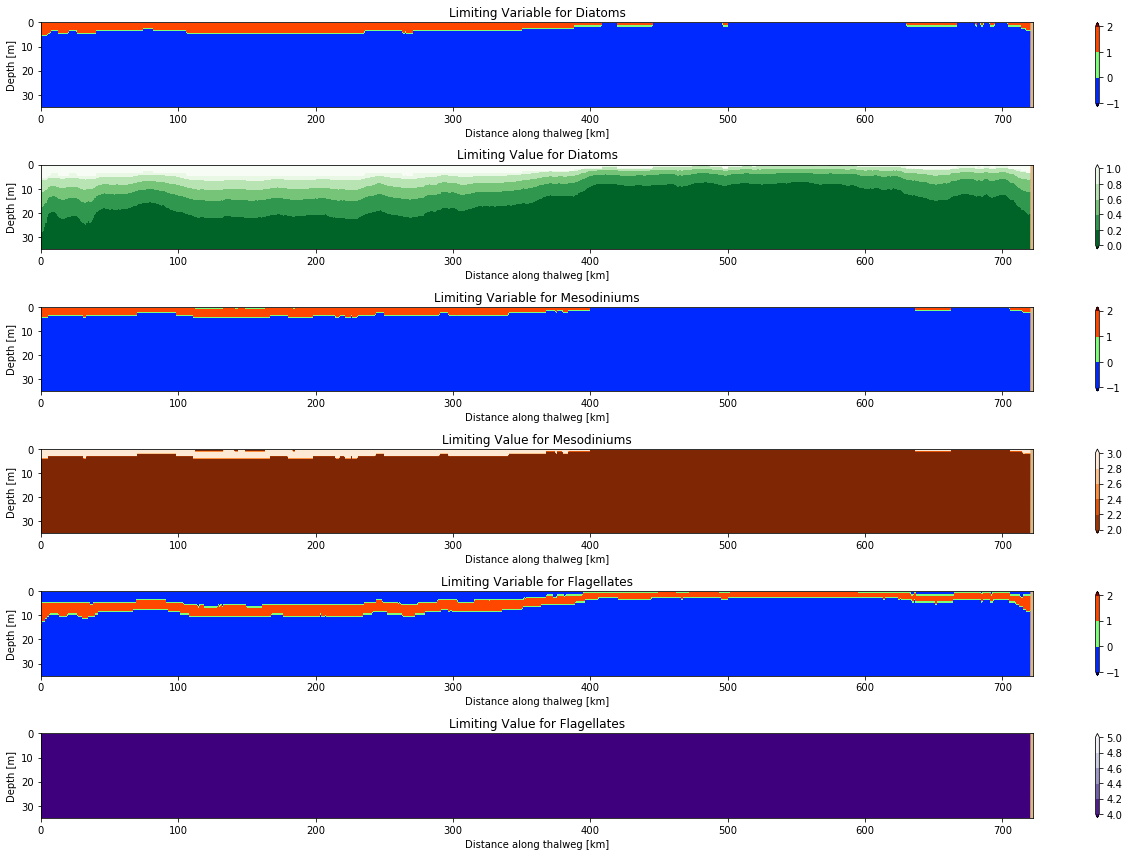

In [14]:
limit_along_thalweg('/results/SalishSea/nowcast-green/28oct16',
                   'SalishSea_2h_20161028_20161106_dia1_T.nc',
                   'SalishSea_1h_20161028_20161028_ptrc_T.nc')

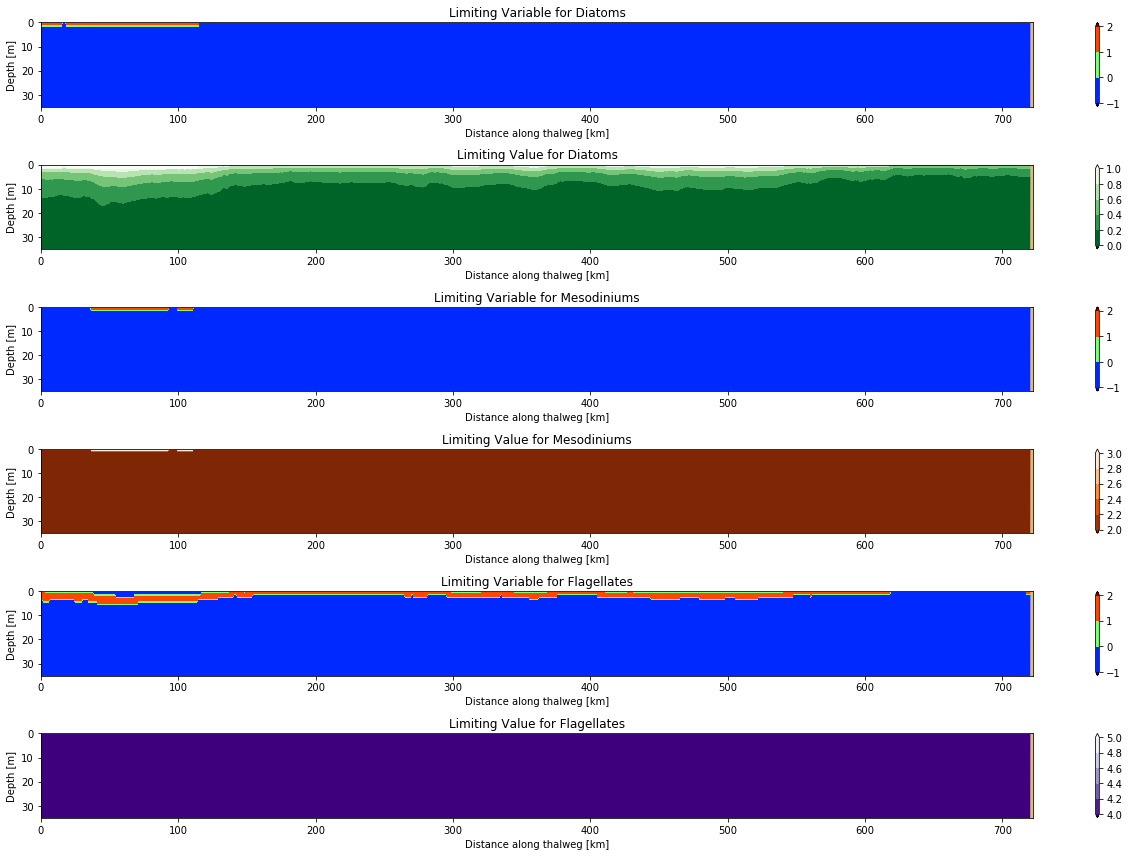

In [15]:
limit_along_thalweg('/results/SalishSea/nowcast-green/27nov16',
                   'SalishSea_2h_20161127_20161206_dia1_T.nc',
                   'SalishSea_1h_20161127_20161127_ptrc_T.nc')

# January 2016

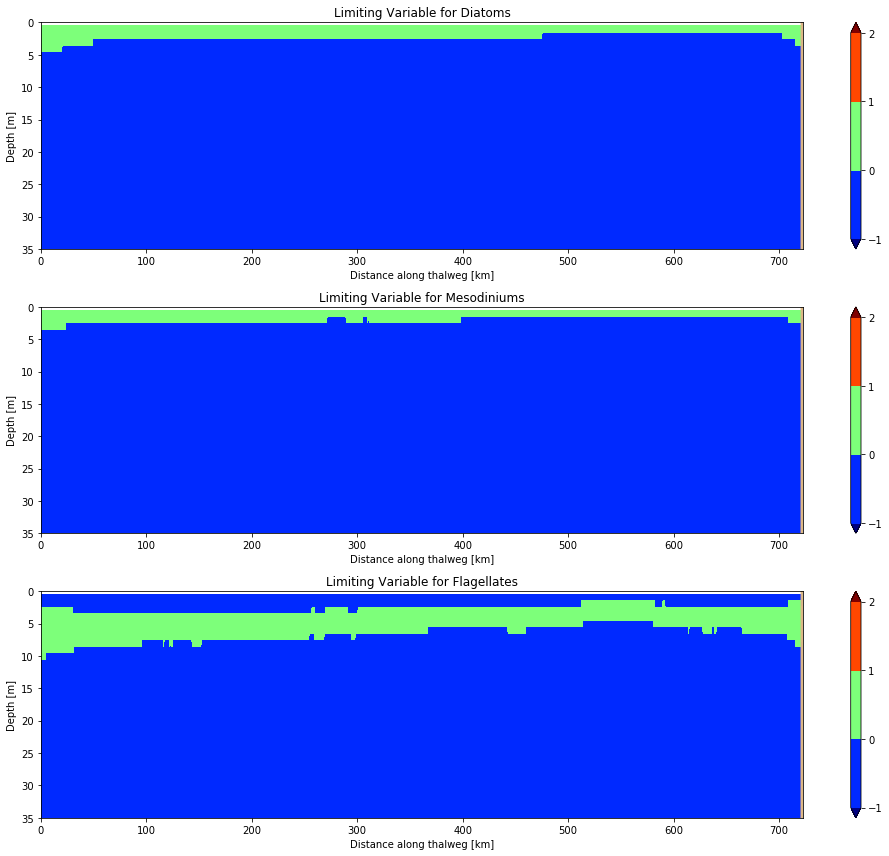

In [82]:
limit_along_thalweg('/results/SalishSea/nowcast-green/02jan16', 
                    'SalishSea_2h_20160102_20160111_dia1_T.nc',
                   'SalishSea_1h_20160102_20160102_ptrc_T.nc')

# Febuary 2016

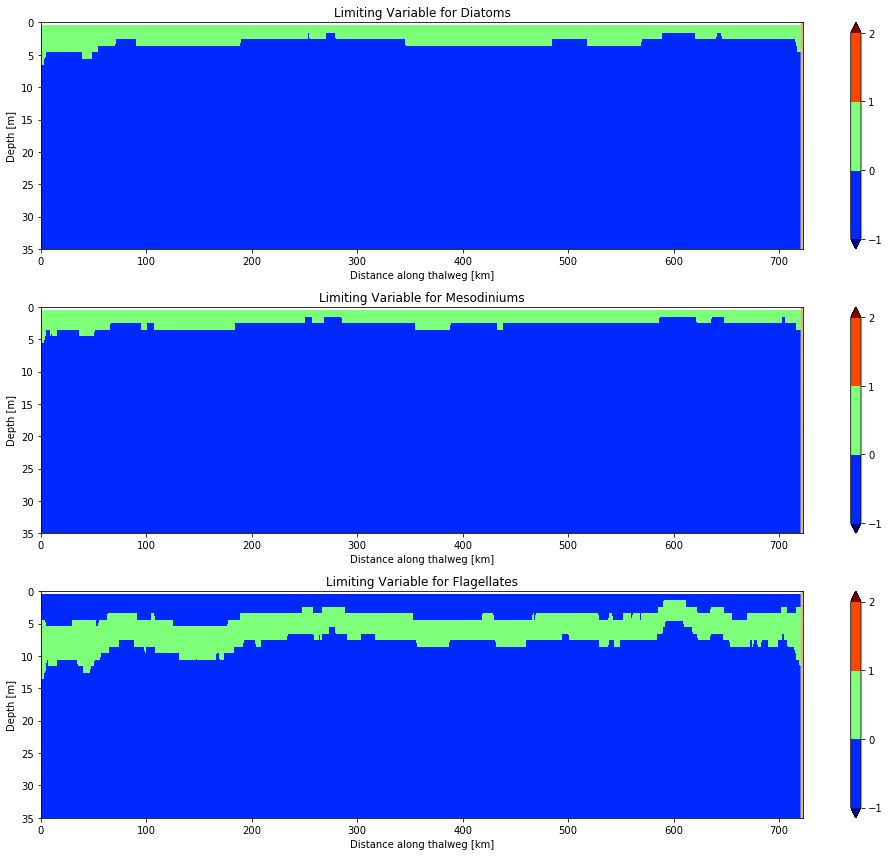

In [83]:
limit_along_thalweg('/results/SalishSea/nowcast-green/01feb16', 
                    'SalishSea_2h_20160201_20160210_dia1_T.nc',
                   'SalishSea_1h_20160201_20160201_ptrc_T.nc')

# March 2016

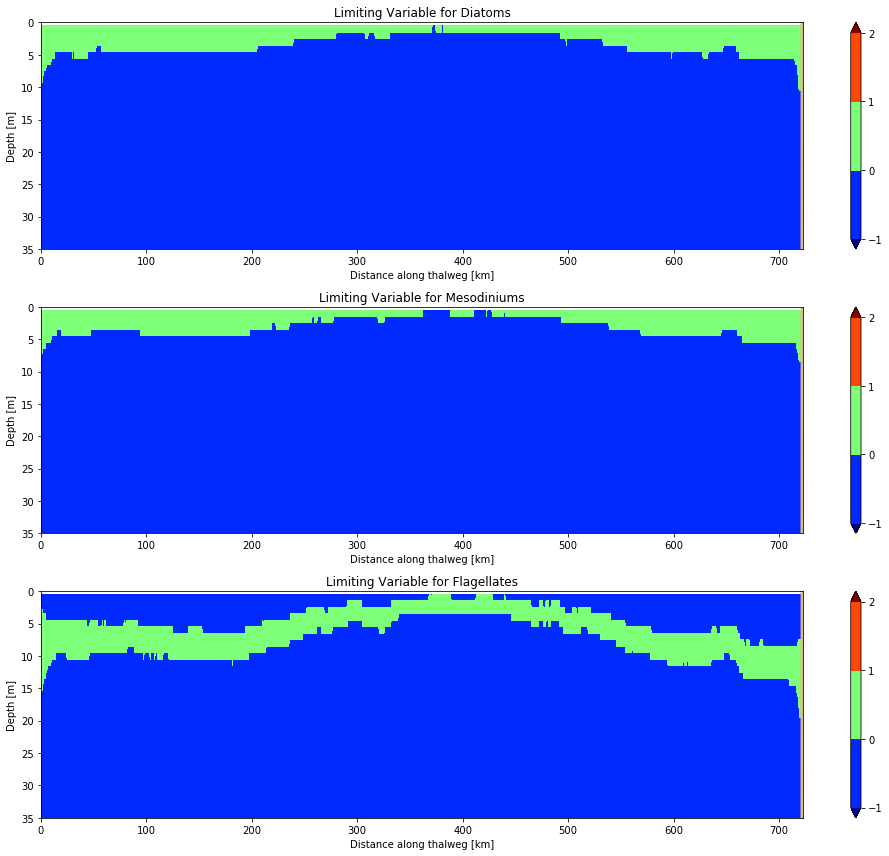

In [84]:
limit_along_thalweg('/results/SalishSea/nowcast-green/02mar16',
                   'SalishSea_2h_20160302_20160311_dia1_T.nc',
                   'SalishSea_1h_20160302_20160302_ptrc_T.nc')

# April 2016

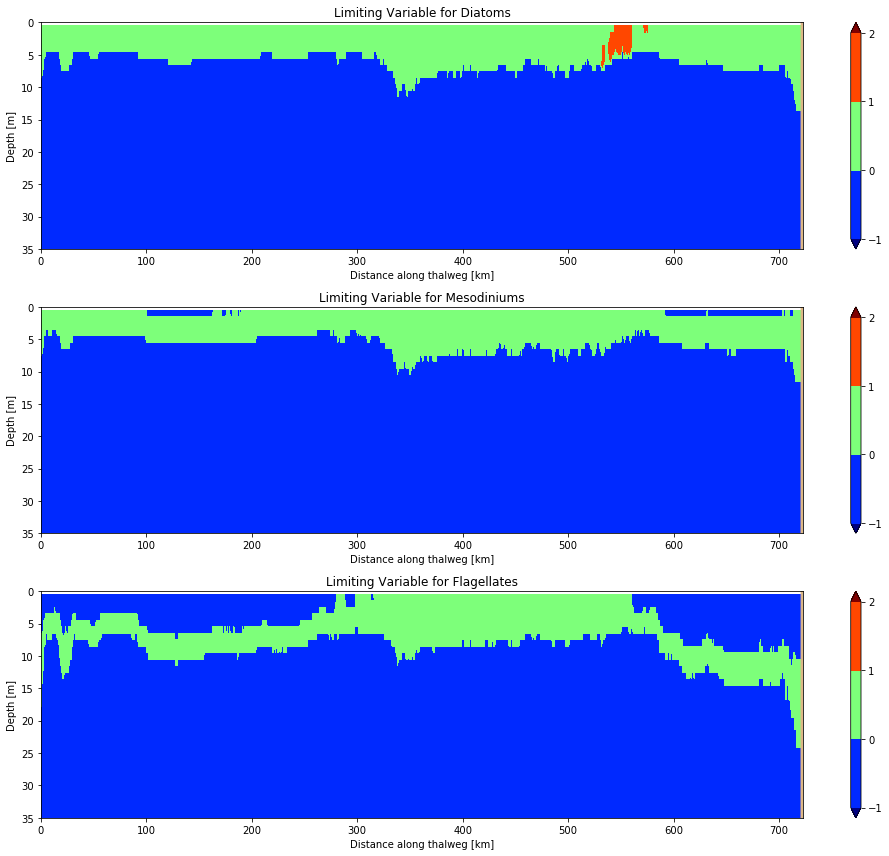

In [85]:
limit_along_thalweg('/results/SalishSea/nowcast-green/01apr16',
                   'SalishSea_2h_20160401_20160410_dia1_T.nc',
                   'SalishSea_1h_20160401_20160401_ptrc_T.nc')

# May 2016

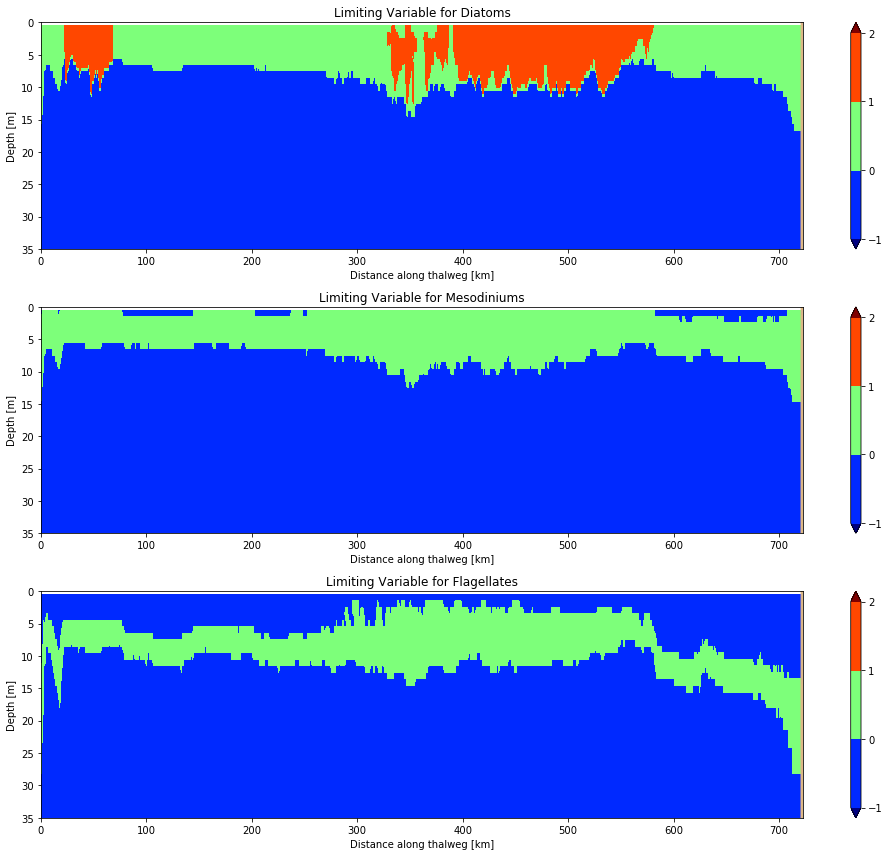

In [86]:
limit_along_thalweg('/results/SalishSea/nowcast-green/01may16',
                   'SalishSea_2h_20160501_20160510_dia1_T.nc',
                   'SalishSea_1h_20160501_20160501_ptrc_T.nc')

# June ish 2016

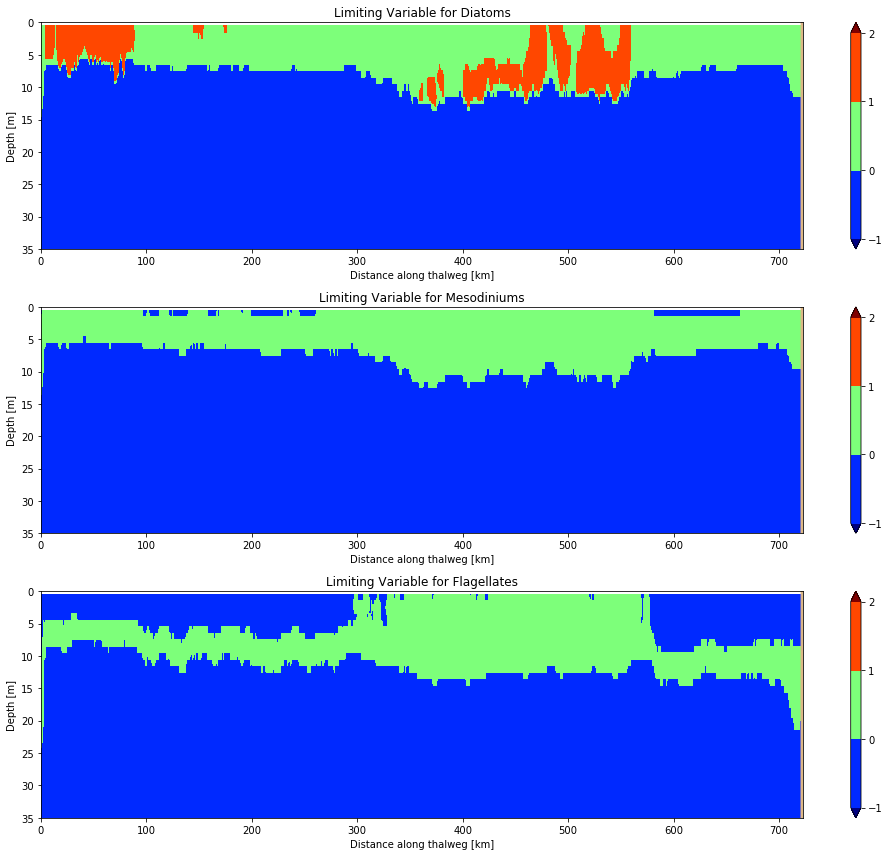

In [87]:
limit_along_thalweg('/results/SalishSea/nowcast-green/31may16',
                   'SalishSea_2h_20160531_20160609_dia1_T.nc',
                   'SalishSea_1h_20160531_20160531_ptrc_T.nc')

# July ish 2016

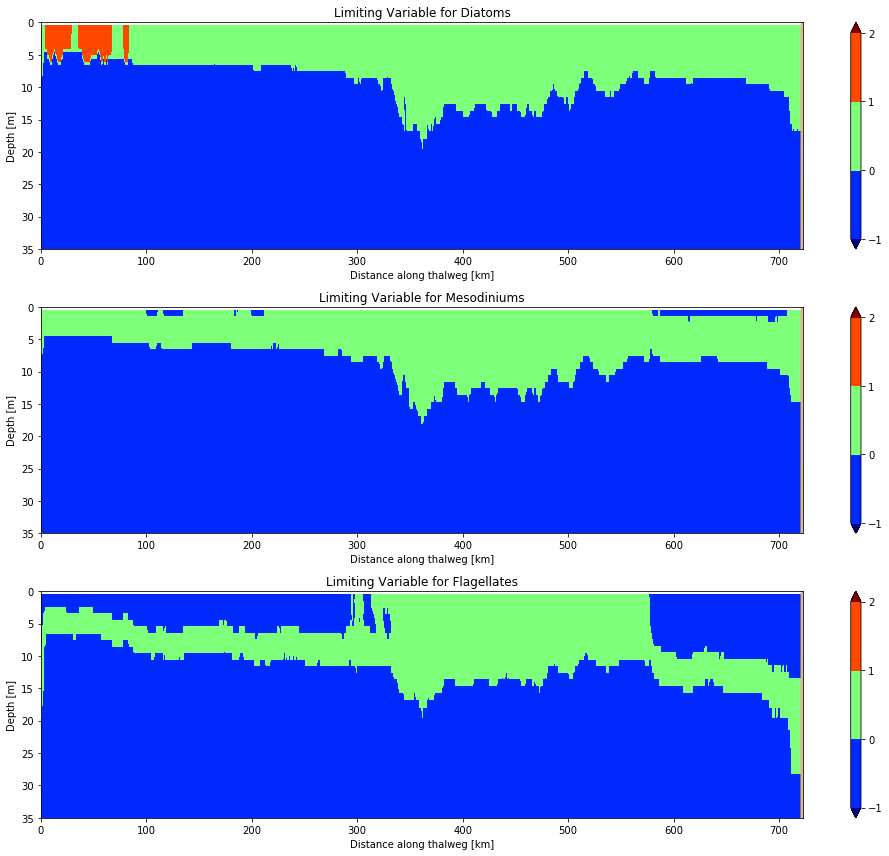

In [88]:
limit_along_thalweg('/results/SalishSea/nowcast-green/30jun16',
                   'SalishSea_2h_20160630_20160709_dia1_T.nc',
                   'SalishSea_1h_20160630_20160630_ptrc_T.nc')

# August ish 2016

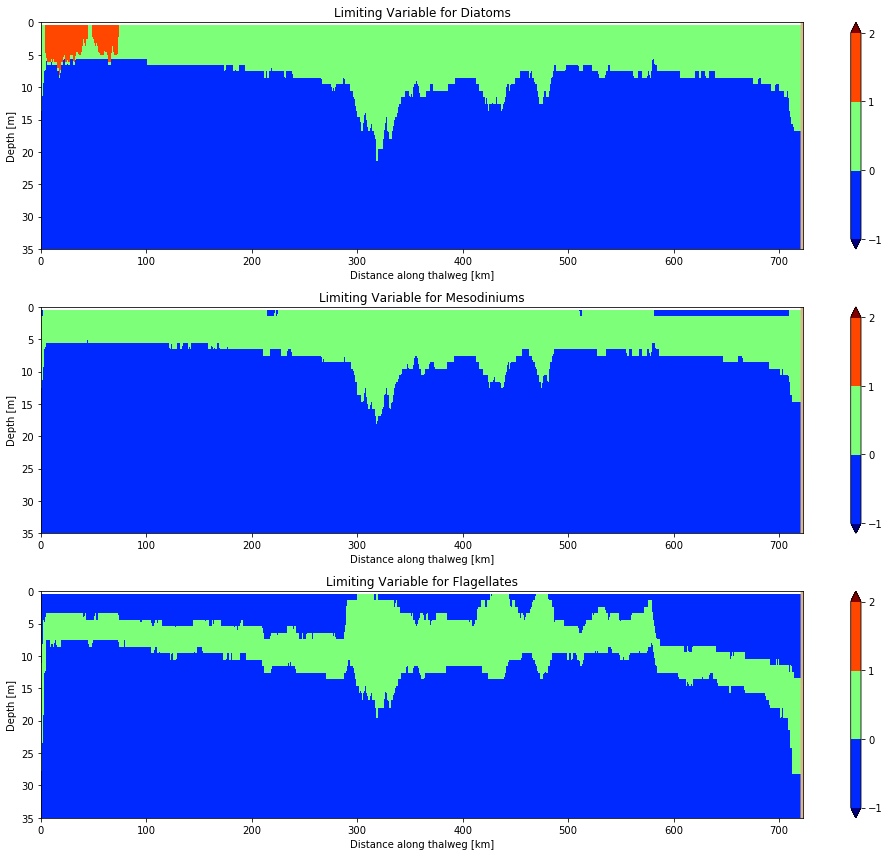

In [89]:
limit_along_thalweg('/results/SalishSea/nowcast-green/30jul16',
                   'SalishSea_2h_20160730_20160808_dia1_T.nc',
                   'SalishSea_1h_20160730_20160730_ptrc_T.nc')

# September ish 2016

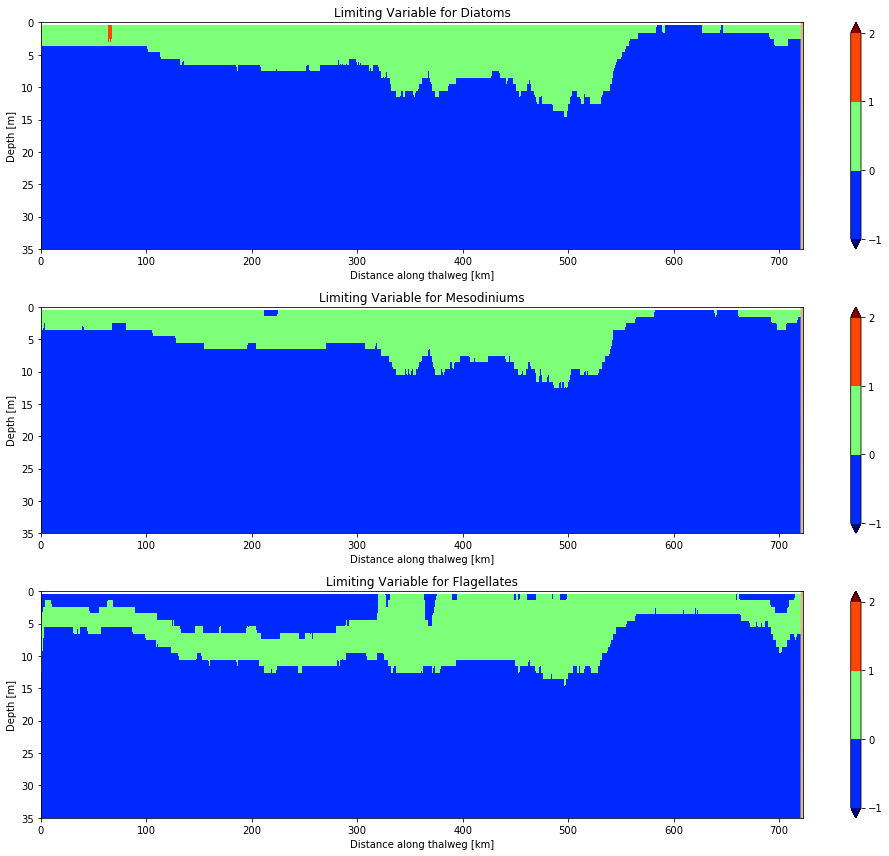

In [90]:
limit_along_thalweg('/results/SalishSea/nowcast-green/29aug16',
                   'SalishSea_2h_20160829_20160907_dia1_T.nc',
                   'SalishSea_1h_20160829_20160829_ptrc_T.nc')

# October ish 2016

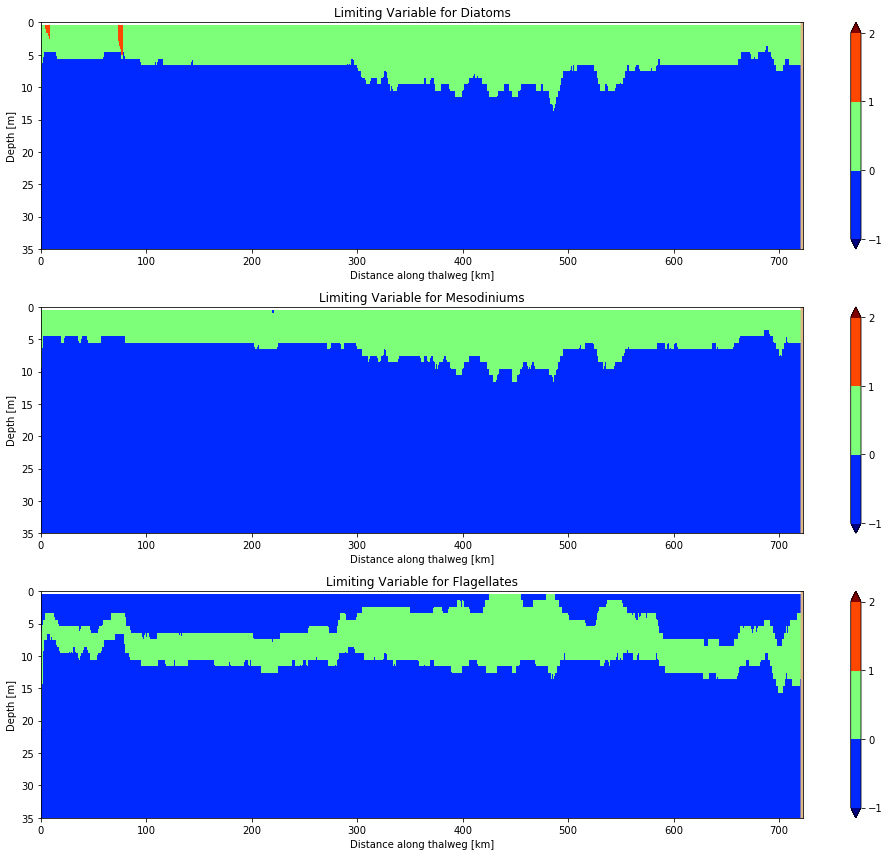

In [91]:
limit_along_thalweg('/results/SalishSea/nowcast-green/28sep16',
                   'SalishSea_2h_20160928_20161007_dia1_T.nc',
                   'SalishSea_1h_20160928_20160928_ptrc_T.nc')

# November ish 2016

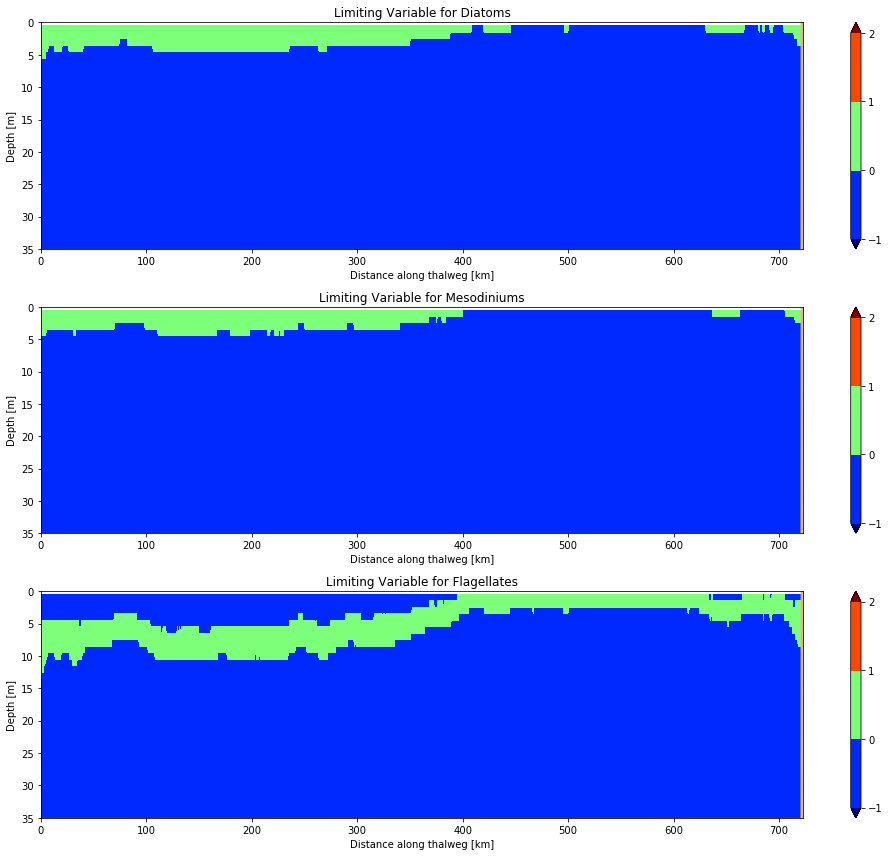

In [92]:
limit_along_thalweg('/results/SalishSea/nowcast-green/28oct16',
                   'SalishSea_2h_20161028_20161106_dia1_T.nc',
                   'SalishSea_1h_20161028_20161028_ptrc_T.nc')

# December ish 2016

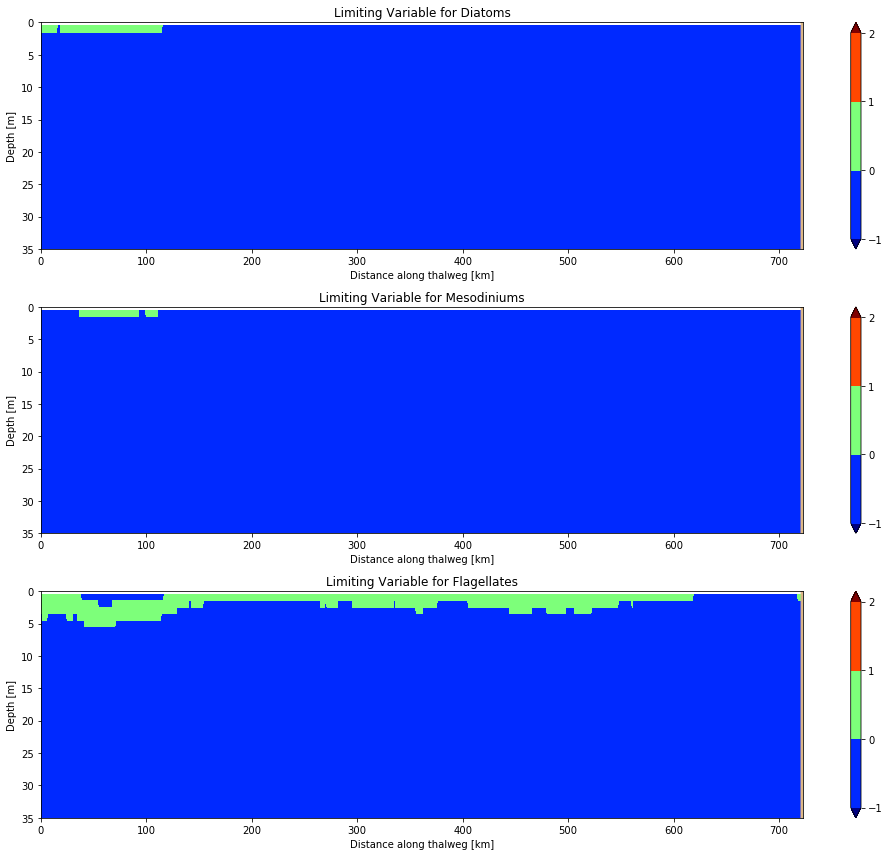

In [93]:
limit_along_thalweg('/results/SalishSea/nowcast-green/27nov16',
                   'SalishSea_2h_20161127_20161206_dia1_T.nc',
                   'SalishSea_1h_20161127_20161127_ptrc_T.nc')